In [2]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv("/Users/zhiruzhu/Desktop/DP_libraries/DP_test/PUMS.csv")
# df = df.head(100)
df

,age,sex,educ,race,income,married,pid
0,59,1,9,1,0.0,1,1
1,31,0,1,3,17000.0,0,2
2,36,1,11,1,0.0,1,3
3,54,1,11,1,9100.0,1,4
4,39,0,5,3,37000.0,0,5
...,...,...,...,...,...,...,...
995,73,0,3,3,24200.0,0,996
996,38,1,2,3,0.0,0,997
997,50,0,13,1,22000.0,1,998
998,44,1,14,4,500.0,1,999


In [4]:
average_age = np.average(df["age"])
average_age

44.797

In [5]:
# computing how much the query result would change by removing each individual(record) out

changes = []
for i in range(len(df)):
    cur_df = df.copy()
    cur_df = cur_df.drop([i])
    assert len(cur_df) == len(df) - 1

    change = average_age - np.average(cur_df["age"])
    changes.append(change)
changes

[0.01421721721721525,
 -0.013810810810817031,
 -0.008805805805806699,
 0.009212212212212023,
 -0.005802802802804763,
 -0.01080780780780799,
 0.048251251251251404,
 0.024227227227221704,
 -0.0048018018018041175,
 -0.017814814814819613,
 0.01421721721721525,
 -0.013810810810817031,
 0.02823123123123139,
 0.04424724724724172,
 -0.005802802802804763,
 0.006209209209202982,
 -0.01280980980980928,
 0.007210210210210732,
 -0.02081781781782155,
 0.0032062062062010455,
 0.006209209209202982,
 -0.0017987987988021814,
 -0.015812812812818322,
 -0.000797797797801536,
 0.042245245245240426,
 -0.017814814814819613,
 0.013216216216214605,
 -0.01280980980980928,
 0.029232232232232036,
 -0.016813813813818967,
 0.02522822822822235,
 -0.009806806806807344,
 -0.008805805805806699,
 0.01822122122121783,
 -0.023820820820823485,
 -0.015812812812818322,
 -0.000797797797801536,
 -0.009806806806807344,
 -0.0017987987988021814,
 0.01421721721721525,
 0.008211211211211378,
 -0.0027997997998028268,
 -0.012809809809

In [6]:
total_abs_change = sum(abs(x) for x in changes)
total_abs_change

14.36982182182198

In [7]:
original_variance = np.var(changes)
original_variance

0.0003152139035932864

In [8]:
mean = np.mean(changes)
mean

-2.9629632081196176e-15

In [9]:
print(np.percentile(changes, 25), np.percentile(changes, 50), np.percentile(changes, 75))

-0.013810810810817031 -0.0027997997998028268 0.010213213213212669


In [33]:
# add DP noise
# try different epsilon values

import diffprivlib as dp

eps_list = np.arange(0.01, 10, 0.01, dtype=float) #[0.01, 0.1, 1, 10, 100]
sensitivity = (df["age"].max() - df["age"].min()) / len(df)

variances = []

for eps in eps_list:

    # print("eps", eps)

    laplace = dp.mechanisms.Laplace(epsilon=eps, sensitivity=sensitivity)
    dp_average = laplace.randomise(np.average(average_age))

    changes = []

    for i in range(len(df)):
        cur_df = df.copy()
        cur_df = cur_df.drop([i])

        cur_dp_average = laplace.randomise(np.average(cur_df["age"]))

        change = dp_average - cur_dp_average
        changes.append(change)

    # total_abs_change = sum(abs(x) for x in changes)
    # print(total_abs_change)
    variance = np.var(changes)
    variances.append(variance)
    # print("var", variance)
    # std = np.std(changes)
    # print("std", std)

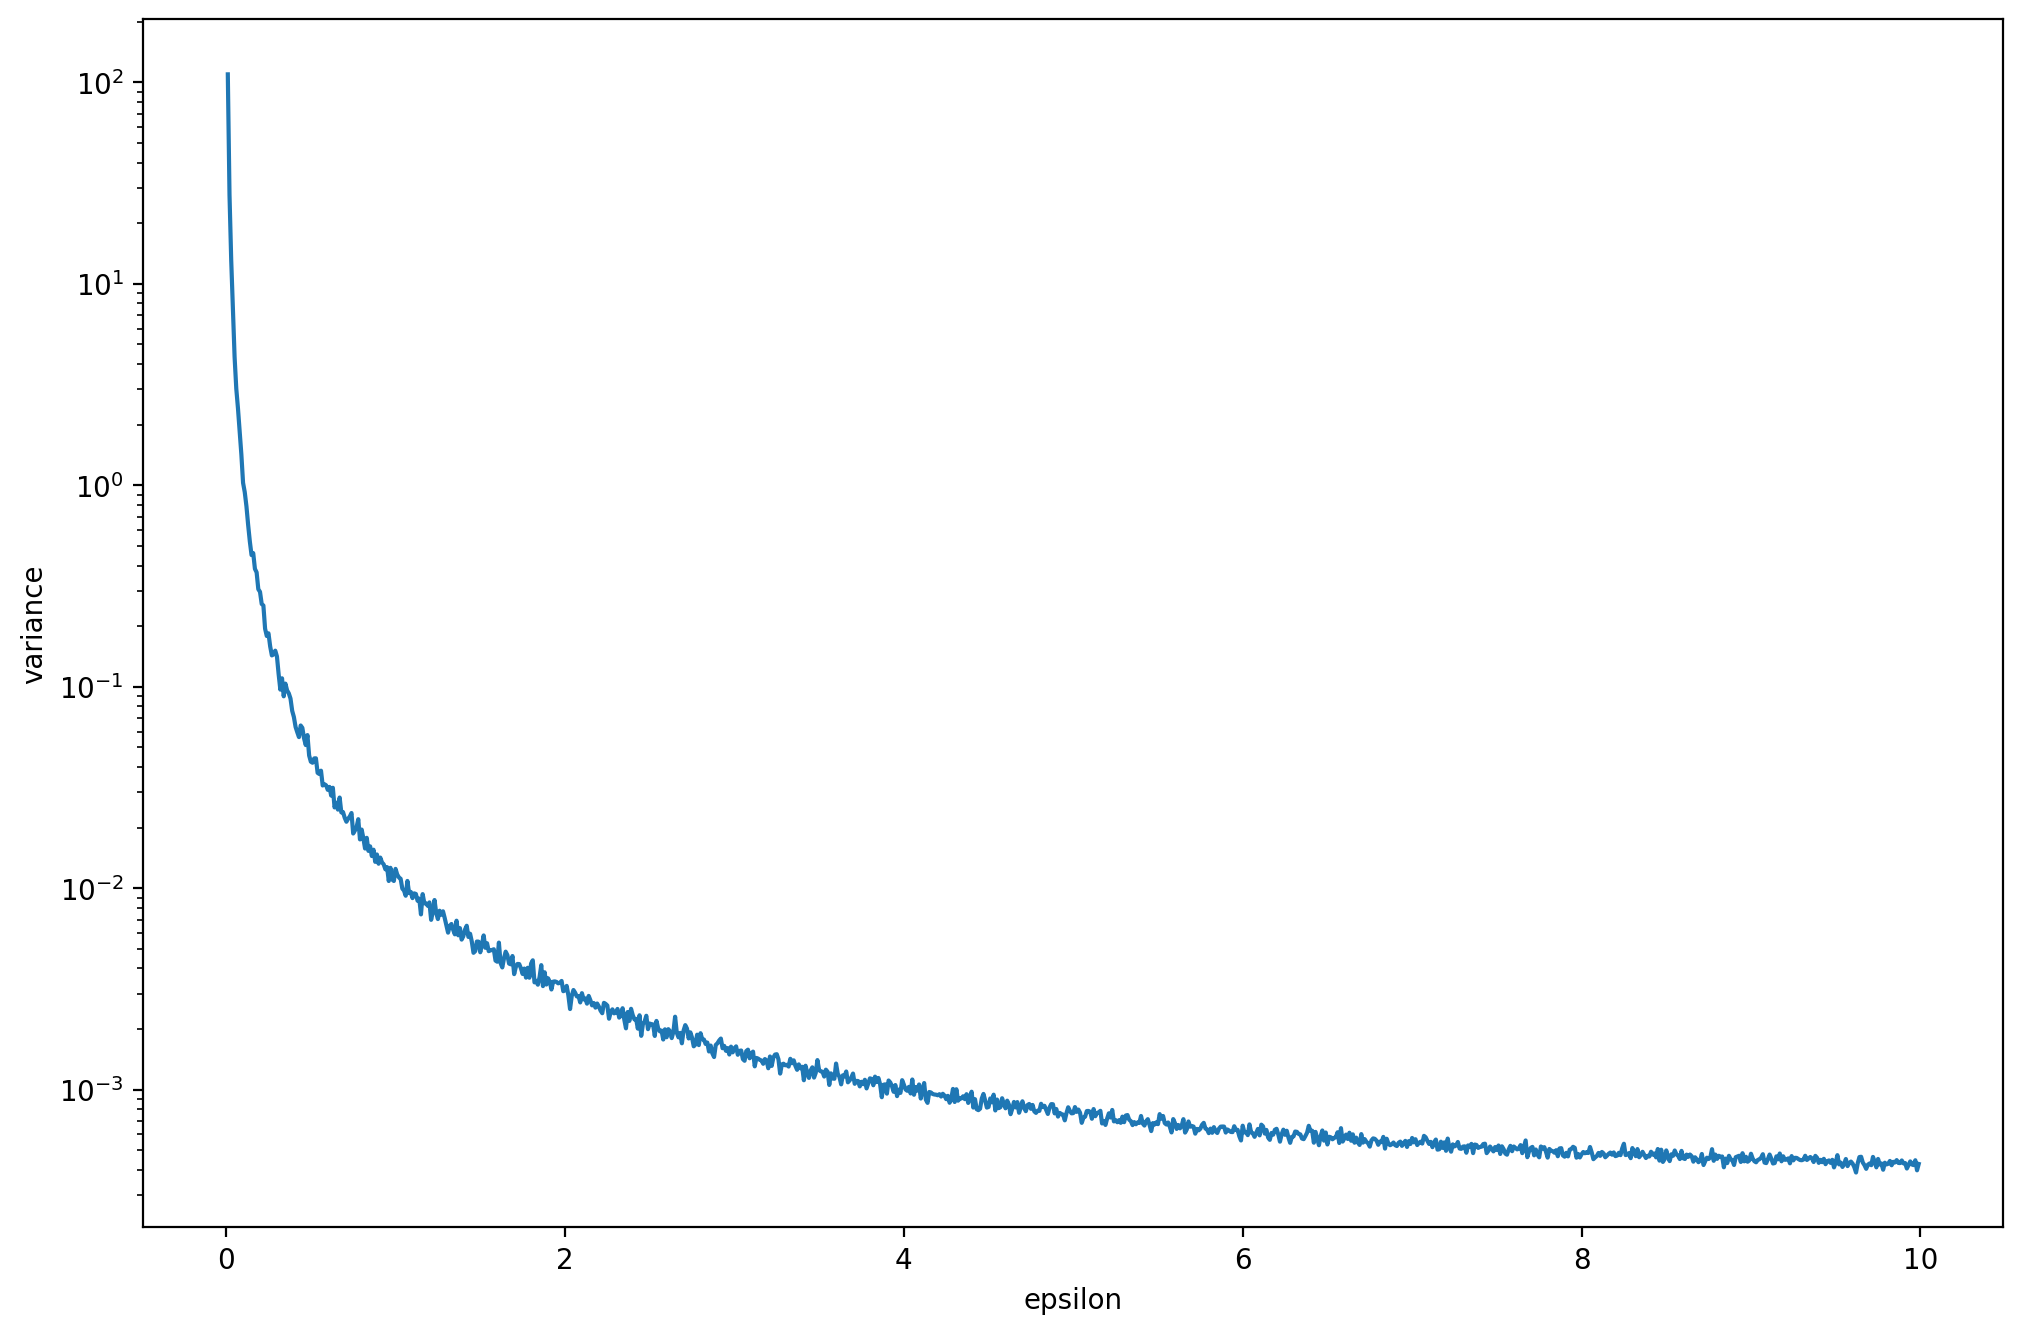

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8), dpi=200)
plt.plot(eps_list, variances)
plt.yscale("log")
plt.xlabel("epsilon")
plt.ylabel("variance")
plt.show()

In [1]:
for i, var in enumerate(variances):
    if var < original_variance:
        print(var, eps_list[i])
        break

NameError: name 'variances' is not defined